### 라이브러리 로드

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%config Completer.use_jedi = False

%matplotlib inline

### 데이터셋 로드

In [2]:
df = pd.read_csv("diabetes.csv")
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df_null = df.isnull()
df_null.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [6]:
df_null.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# 수치 데이터에 대한 요약

df.describe(include="number")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# 가장 마지막에 있는 Outcome은 label 값이기 때문에 제외
# 학습과 예측에 사용할 컬럼을 만들어 준다.
# feature_columns 라는 변수에 담아준다.

feature_columns = df.columns[:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

### 결측치 시각화
값을 요약해 보면 최소값이 0으로 나오는 컬럼들이 있다.<br/>
0이 나올 수 있는 컬럼도 있지만 인슐린이나 혈압 등의 값은 0값이 결측치라고 볼 수 있을 것이다.<br/>
따라서 0인 값을 결측치로 처리하고 시각화해보자.<br/>

In [9]:
cols = feature_columns[1:]
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [10]:
# 결측치 여부를 나타내는 데이터프레임을 만든다.
# 0값을 결측치라 가정하고 정답(label, target)값을 제외한 컬럼에 대해
# 결측치 여부를 구해서 df_null 이라는 데이터프레임에 담는다.

df_null = df[cols].replace(0, np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [11]:
df_null.mean() * 100

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

<AxesSubplot:>

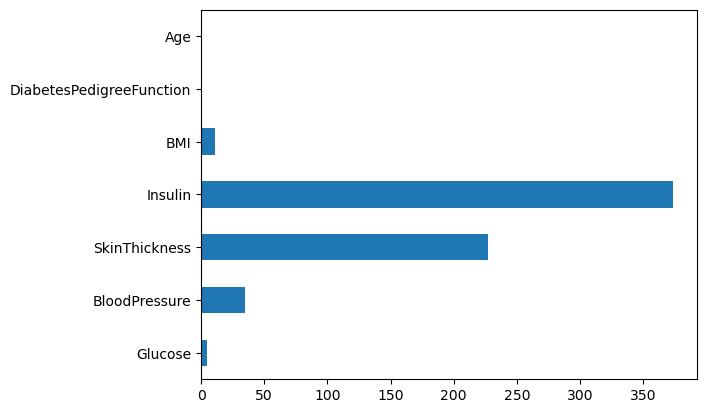

In [12]:
# 결측치의 개수를 구해 막대 그래프로 시각화
df_null.sum().plot.barh()

<AxesSubplot:>

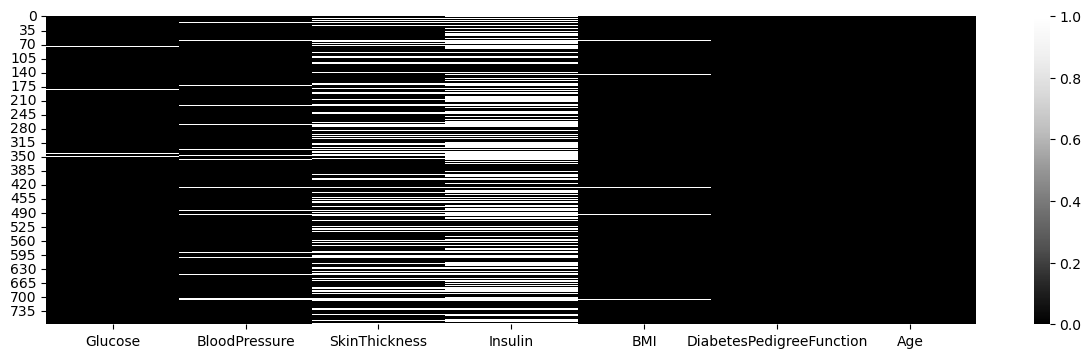

In [13]:
# 결측치를 heatmap으로 시각화
plt.figure(figsize=(15,4))
sns.heatmap(df_null, cmap="Greys_r") # 결측치가 흰색으로 표시됨

### 정답값
* target, label 이라고도 부른다.

In [14]:
# 정답값인 Outcome의 개수
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [15]:
# 정답값인 Outcome의 비율
df["Outcome"].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [16]:
# 다른 변수와 함께 본다.
# 임신 횟수와 정답값을 비교
# "Pregnancies"를 groupby로 그룹화해서 Outcome에 대한 비율을 구한다.
# 결과를 df_po라는 변수에 저장

df_po = df.groupby(["Pregnancies"])["Outcome"].agg(["mean", "count"]).reset_index() # 임신횟수에 따른 당뇨병 평균 횟수, 임신횟수의 빈도수
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


<AxesSubplot:>

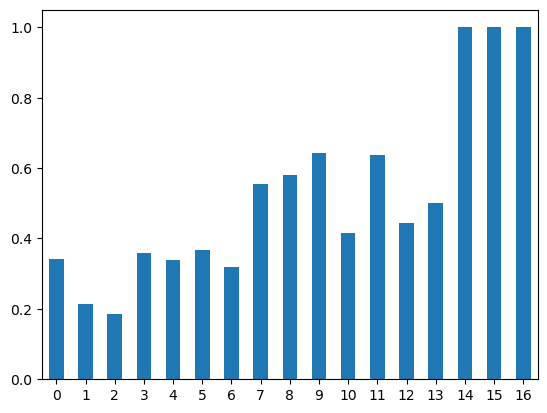

In [17]:
# 임신횟수에 따른 당뇨병 발병 비율
df_po["mean"].plot.bar(rot=0) # 임신횟수가 늘어날수록 발병확률이 높아진다.

### countplot

<AxesSubplot:xlabel='Outcome', ylabel='count'>

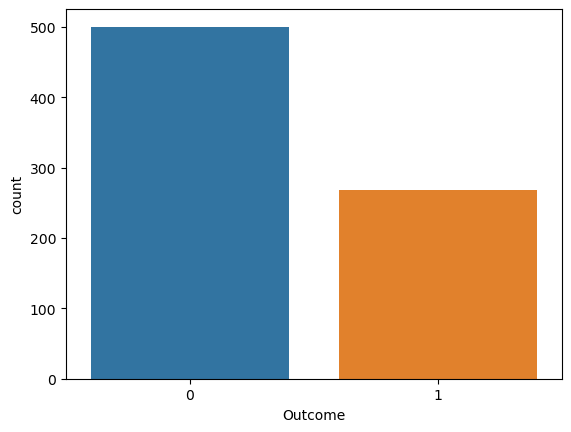

In [18]:
# 위에서 구했던 당뇨병 발병 비율을 구한다.
# 당뇨병 발병 빈도수를 비교

sns.countplot(data=df, x="Outcome")

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

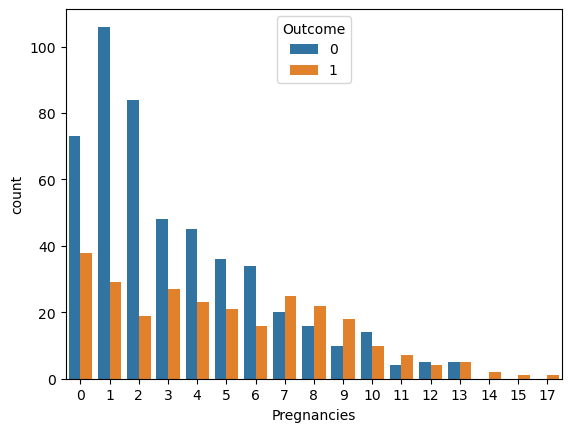

In [19]:
# 임신횟수에 따른 당뇨병 발병 빈도수를 비교

sns.countplot(data=df, x="Pregnancies", hue="Outcome")

In [20]:
# 임심횟수의 많고 적음에 따라 Pregnancies_high 변수를 만든다.

df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies", "Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


<AxesSubplot:xlabel='Pregnancies_high', ylabel='count'>

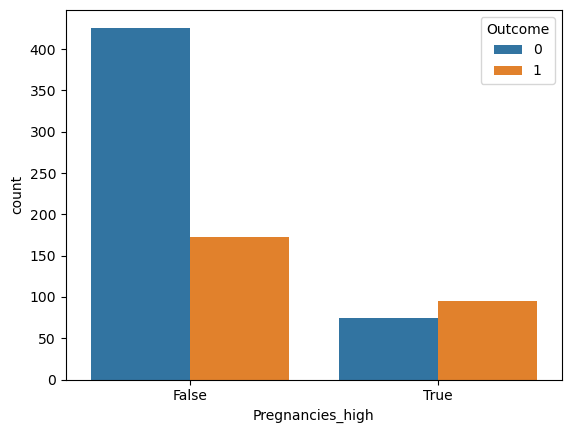

In [21]:
# Pregnancies_high 변수의 빈도수를 countplot 으로 그리고
# Outcome 값에 따라 다른 색상으로 표현

sns.countplot(data=df, x="Pregnancies_high", hue="Outcome")
# 임신횟수가 7이상인 경우에는 당뇨병 발병 횟수가 더 많아진다.

### barplot
* 기본 설정으로 시각화하면 y축에는 평균을 추청해서 그리게 됨

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

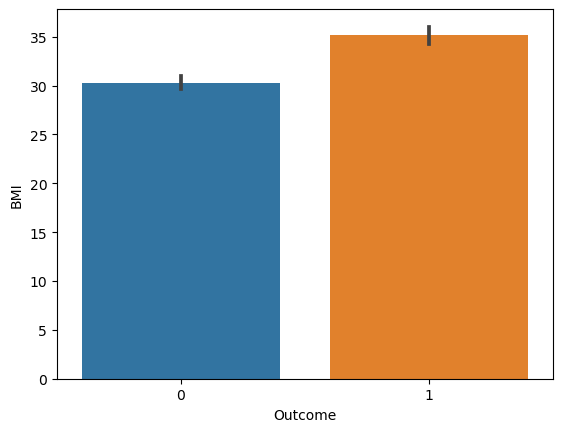

In [24]:
# 당뇨병 발병에 따른 BMI 수치 비교
sns.barplot(data=df, x="Outcome", y="BMI")

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

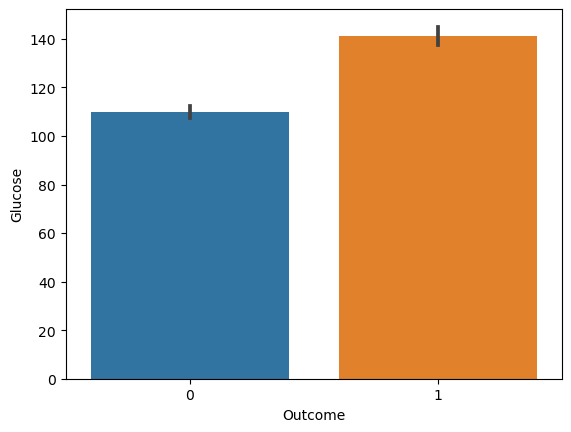

In [27]:
# 당뇨병 발병에 따른 포도당(Glucose)수치 비교

sns.barplot(data=df, x="Outcome", y="Glucose")

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

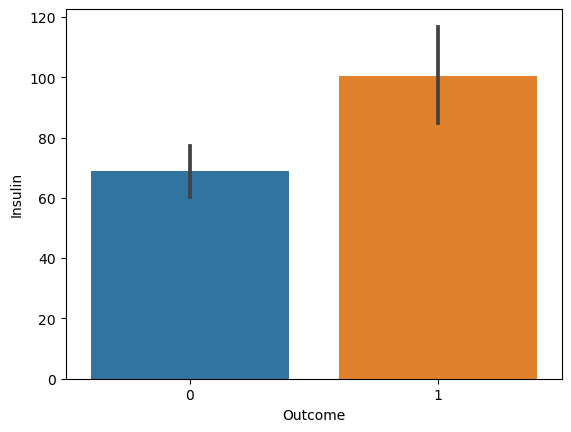

In [28]:
# Insulin 수치가 0 이상안 관측치에 대해서 당뇨병 발병 비교
sns.barplot(data=df, x="Outcome", y="Insulin") # y값은 값들의 평균값임.

<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

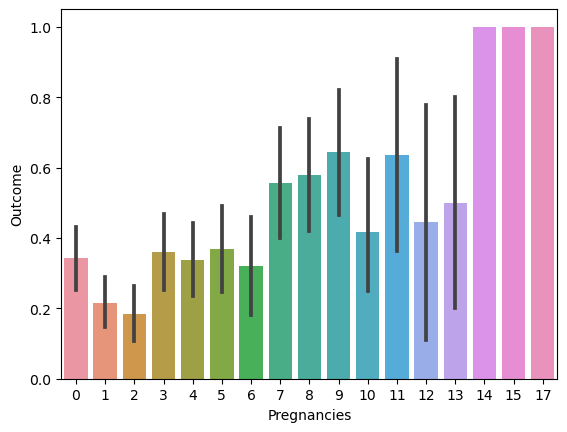

In [29]:
# 임신횟수에 대해서 당뇨병 발병 비율 비교

sns.barplot(data=df, x="Pregnancies", y="Outcome")

<AxesSubplot:xlabel='Pregnancies', ylabel='Glucose'>

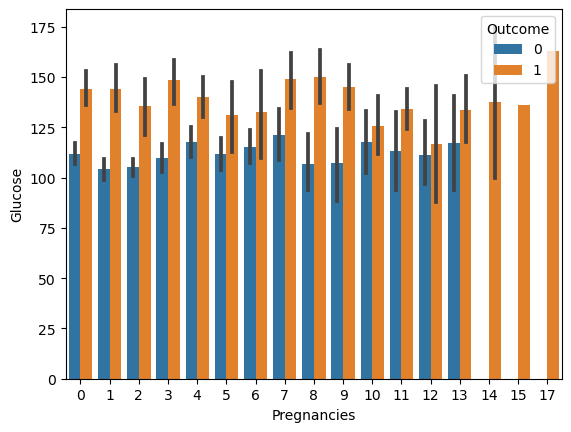

In [30]:
# 임신횟수에 따른 포도당 수치를 당뇨병 발병여부에 따라 시각화
sns.barplot(data=df, x="Pregnancies", y="Glucose", hue="Outcome")

<AxesSubplot:xlabel='Pregnancies', ylabel='BMI'>

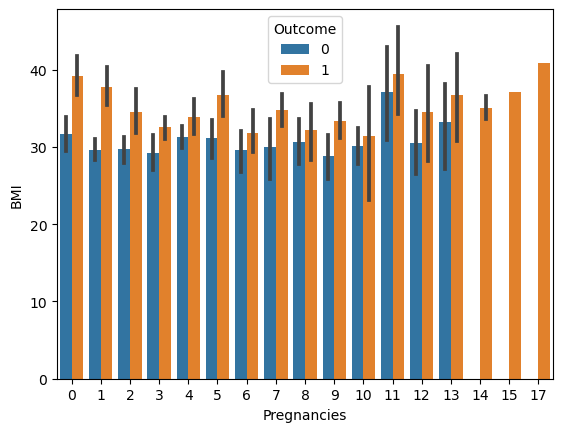

In [31]:
# 임신횟수에 따른 체질량지수를 당뇨병 발병 여부에 따라 시각화
sns.barplot(data=df, x="Pregnancies", y="BMI", hue="Outcome")
# 체질량지수는 임신횟수와 큰 관계가 없는 것처럼 보이나, 당뇨병 발병이 1인 경우 체질량 지수도 높은 것을 확인

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

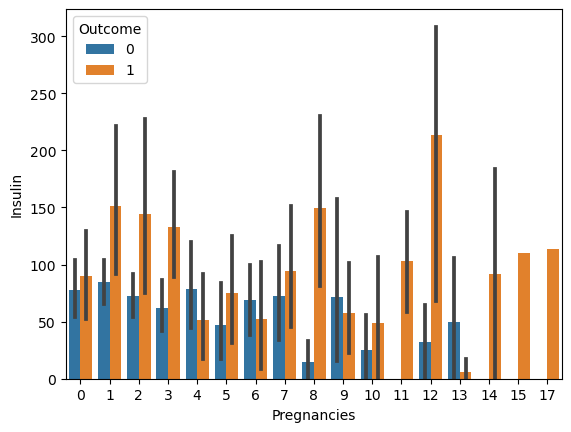

In [32]:
# 임신횟수에 따른 인슐린 수치를 당뇨병 발병 여부에 따라 시각화

sns.barplot(data=df, x="Pregnancies", y="Insulin", hue="Outcome")

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

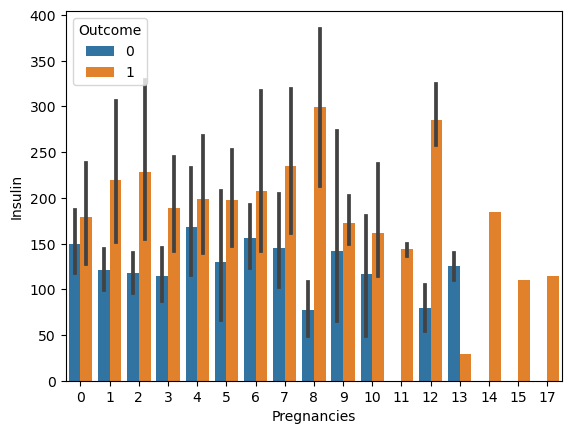

In [36]:
# 인슐린 수치에는 결측치가 없기 때문에 0보다 큰 값에 대해서만 그린다.
sns.barplot(data=df[df["Insulin"]>0], x="Pregnancies", y="Insulin", hue="Outcome")

# 당뇨병이 발병하지 않을 경우 대체적으로 인슐린 수치가 낮다는 것을 확인

### boxplot

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

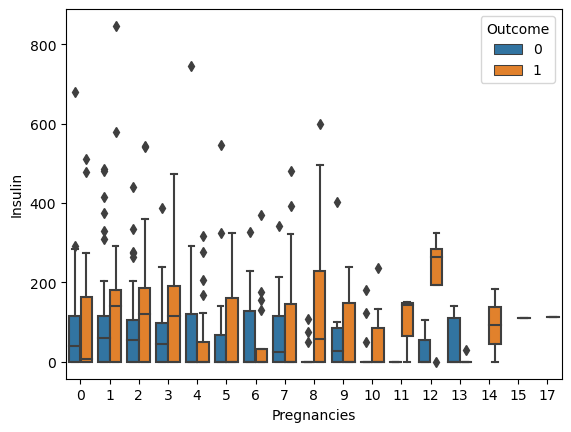

In [34]:
# 임신횟수에 따른 인슐린 수치를 당뇨병 발병 여부에 따라 시각화

sns.boxplot(data=df, x="Pregnancies", y="Insulin", hue="Outcome")

# 인슐린 수치에 0이 많이 있기 때문에 boxplot이 전체적으로 아래에 주저하고 있는 모습

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

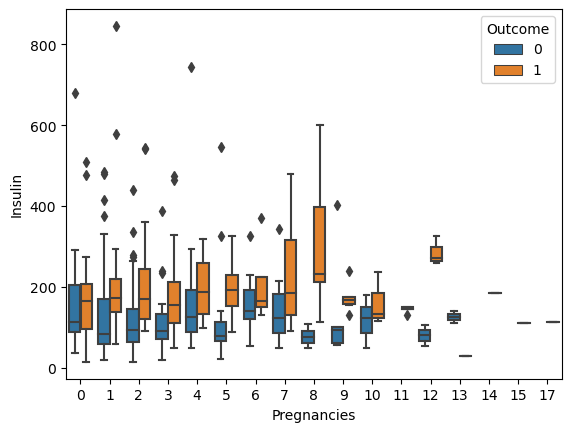

In [35]:
# 인슐린 수치에는 결측치가 많기 때문에 0보다 큰 값에 대해서만 그린다.
sns.boxplot(data=df[df["Insulin"]>0], x="Pregnancies", y="Insulin", hue="Outcome")

### viloinplot

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

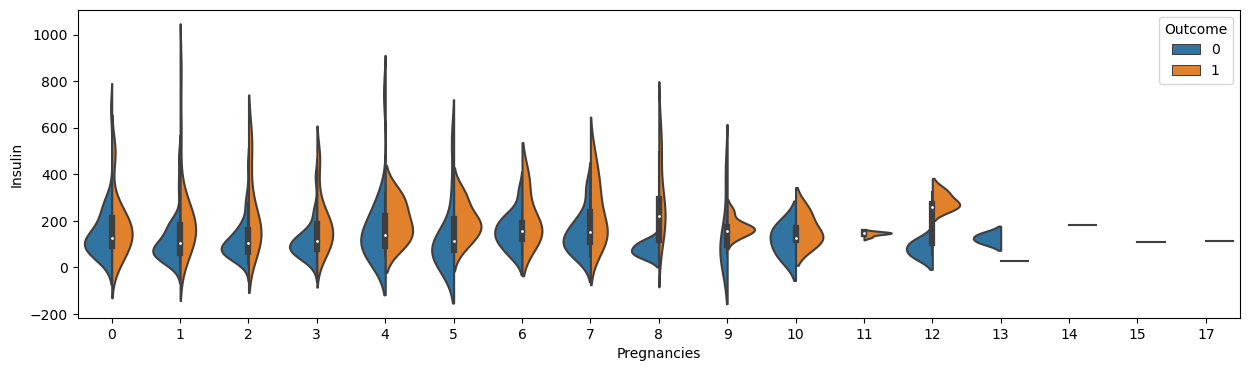

In [40]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df[df["Insulin"]>0], x="Pregnancies", y="Insulin", hue="Outcome", split=True)

### swarmplot

C:\Users\ksh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ksh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ksh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

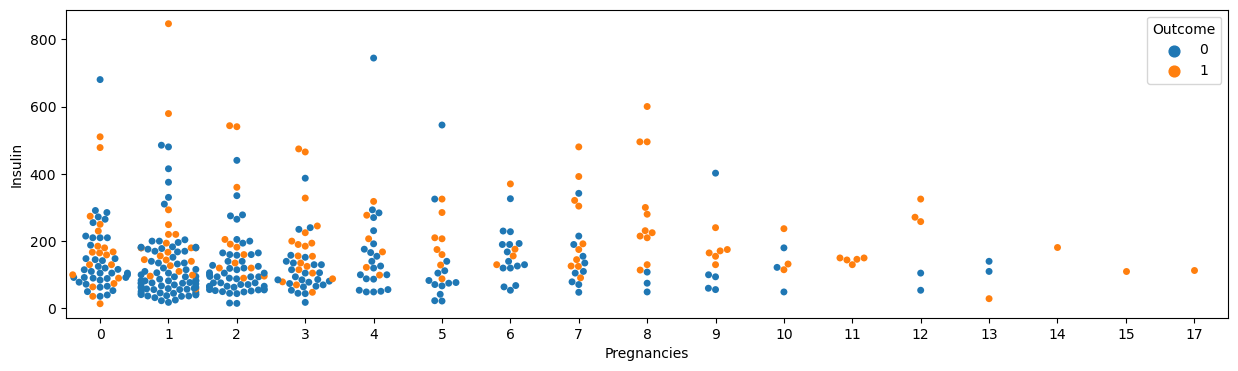

In [43]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=df[df["Insulin"]>0], x="Pregnancies", y="Insulin", hue="Outcome")

### distplot
* 한 개의 수치형 변수를 시각화할 때 사용

In [47]:
df_0 = df[df["Outcome"] == 0]
df_1 = df[df["Outcome"] == 1]
df_0.shape, df_1.shape

((500, 10), (268, 10))

C:\Users\ksh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ksh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

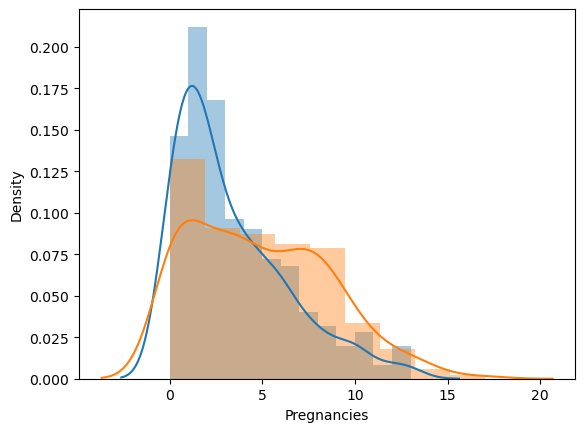

In [48]:
# 임신횟수에 따른 당뇨병 발병 여부를 시각화

sns.distplot(df_0["Pregnancies"])
sns.distplot(df_1["Pregnancies"])

# 임신횟수 5까지는 발병하지 않는 케이스가 더 많다.
# 임신횟수가 5이상일 때에는 발병하는 케이스가 더 많다.

C:\Users\ksh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ksh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

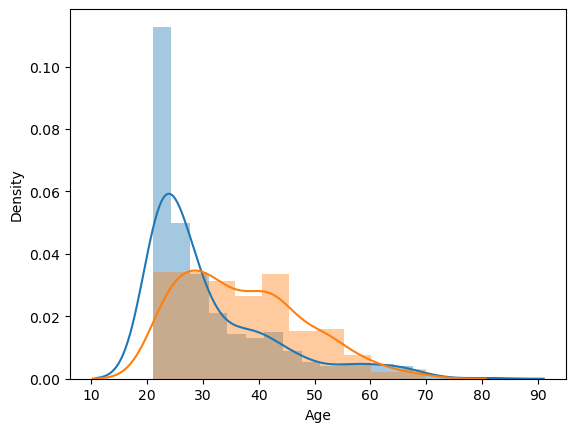

In [51]:
# 나이에 따른 당뇨병 발병 여부 시각화

sns.distplot(df_0["Age"])
sns.distplot(df_1["Age"])

# 30세 이전에는 발병하지 않는 케이스가 더 많다.

C:\Users\ksh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ksh\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\ksh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ksh\anaconda3\lib\site-packages\sea

<AxesSubplot:xlabel='Age', ylabel='Density'>

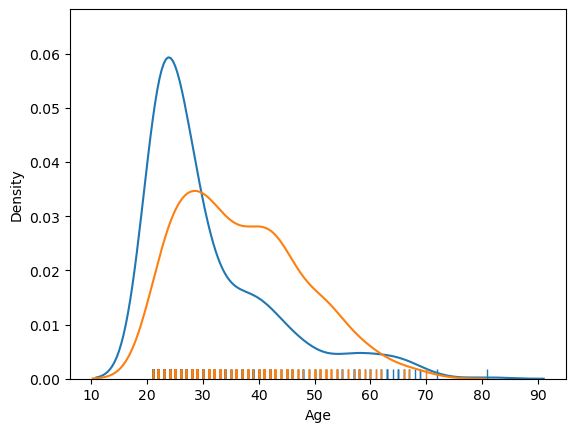

In [54]:
sns.distplot(df_0["Age"], hist=False, rug=True, label=0)
sns.distplot(df_1["Age"], hist=False, rug=True, label=1)

### Subplots

#### Pandas를 통한 histplot 그리기
* pandas를 사용하면 모든 변수에 대한 서브플롯을 한 번에 그려줌.

In [57]:
df["Pregnancies_high"] = df["Pregnancies_high"].astype(int)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,0
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1
764,2,122,70,27,0,36.8,0.340,27,0,0
765,5,121,72,23,112,26.2,0.245,30,0,0
766,1,126,60,0,0,30.1,0.349,47,1,0


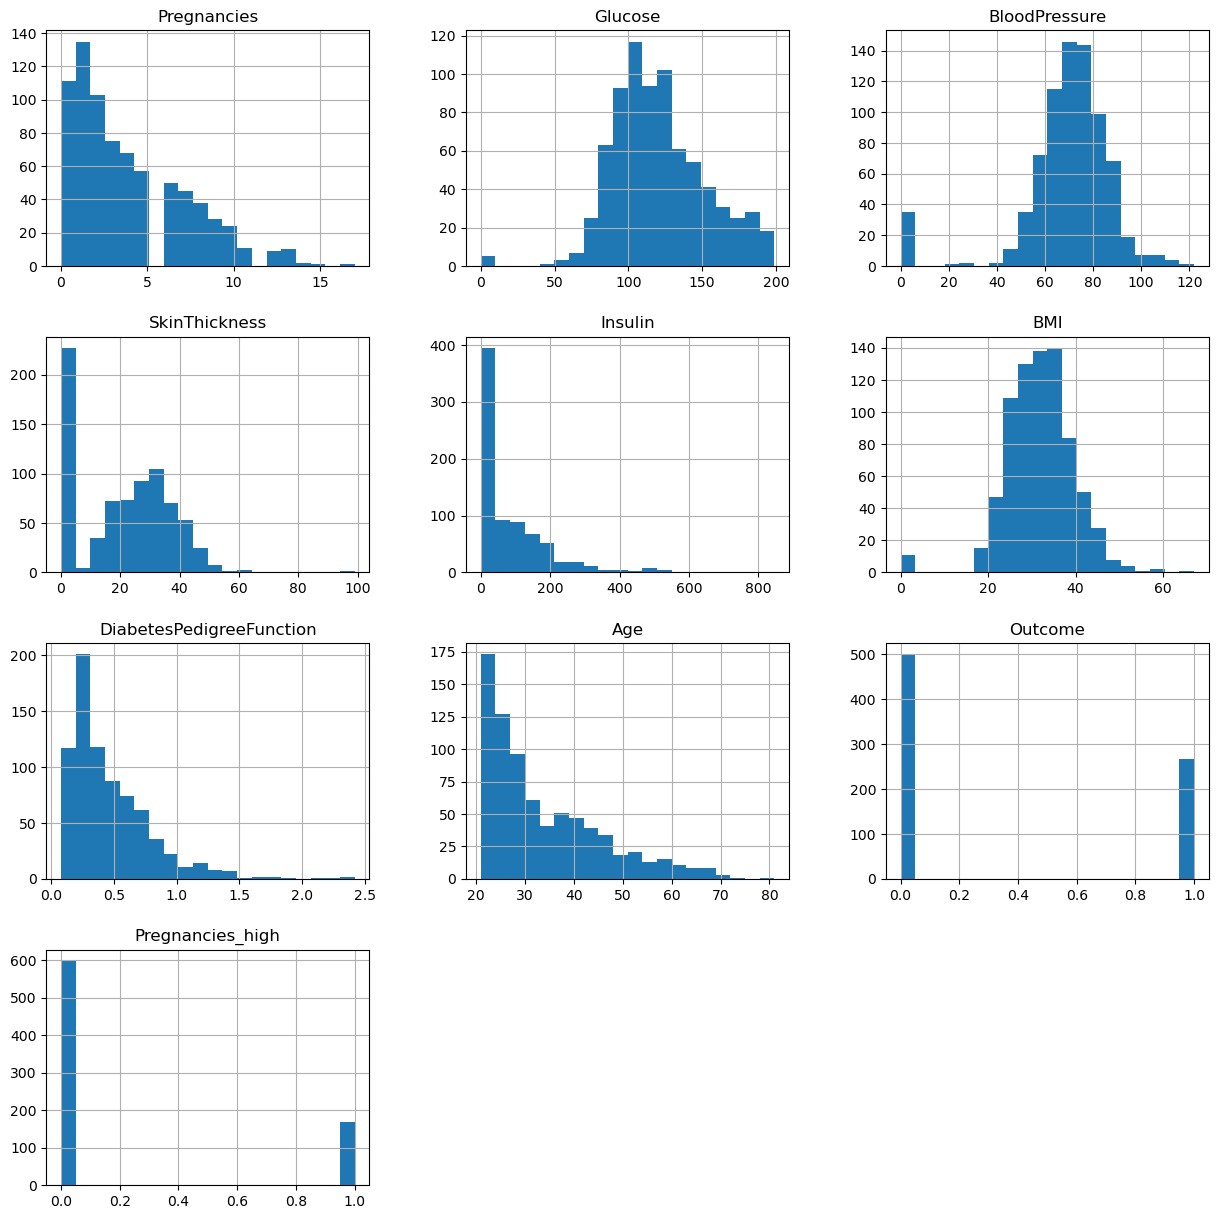

In [61]:
h = df.hist(figsize=(15,15), bins=20)

#### 반복문을 통해서 서브플롯 그리기

#### distplot

In [72]:
# 컬럼의 수 만큼 for문을 만들어서 서브플롯으로 시각화

cols = df.columns[:-1].tolist()
print(cols)

col_num = df.columns[:-1].shape
col_num

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


(9,)

C:\Users\ksh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ksh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ksh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

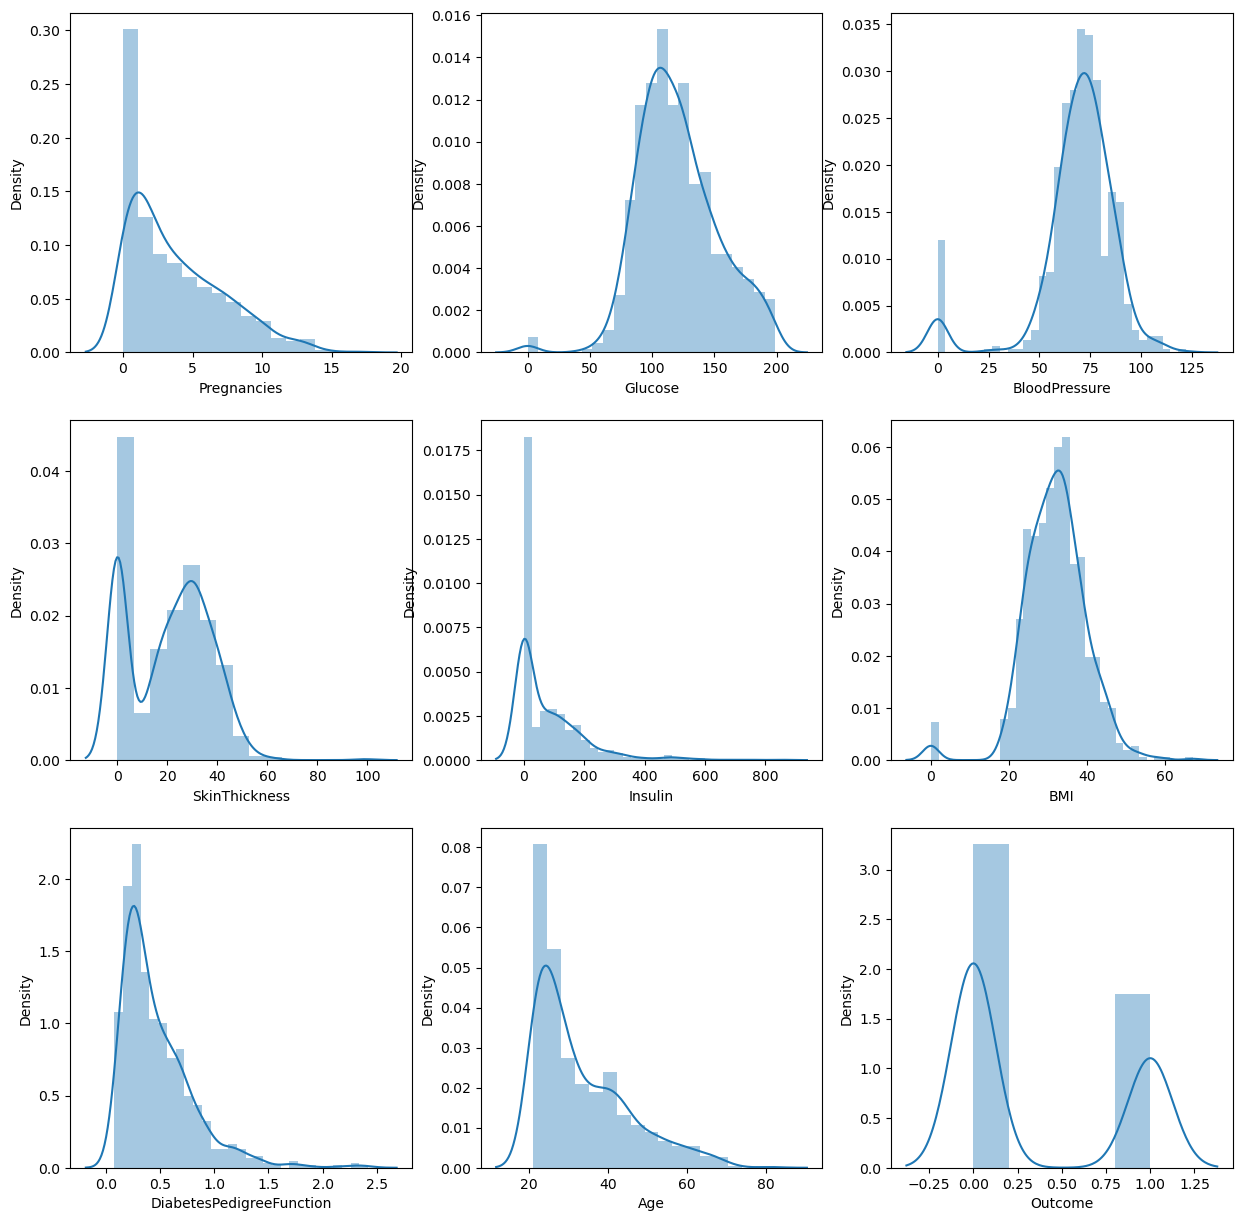

In [77]:
# displot으로 서브플롯 그리기

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

for i, col_name in enumerate(cols):
    row = i // 3 # 소수점 제외한 몫
    col = i % 3
    sns.distplot(df[col_name], ax=axes[row][col])

C:\Users\ksh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ksh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ksh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

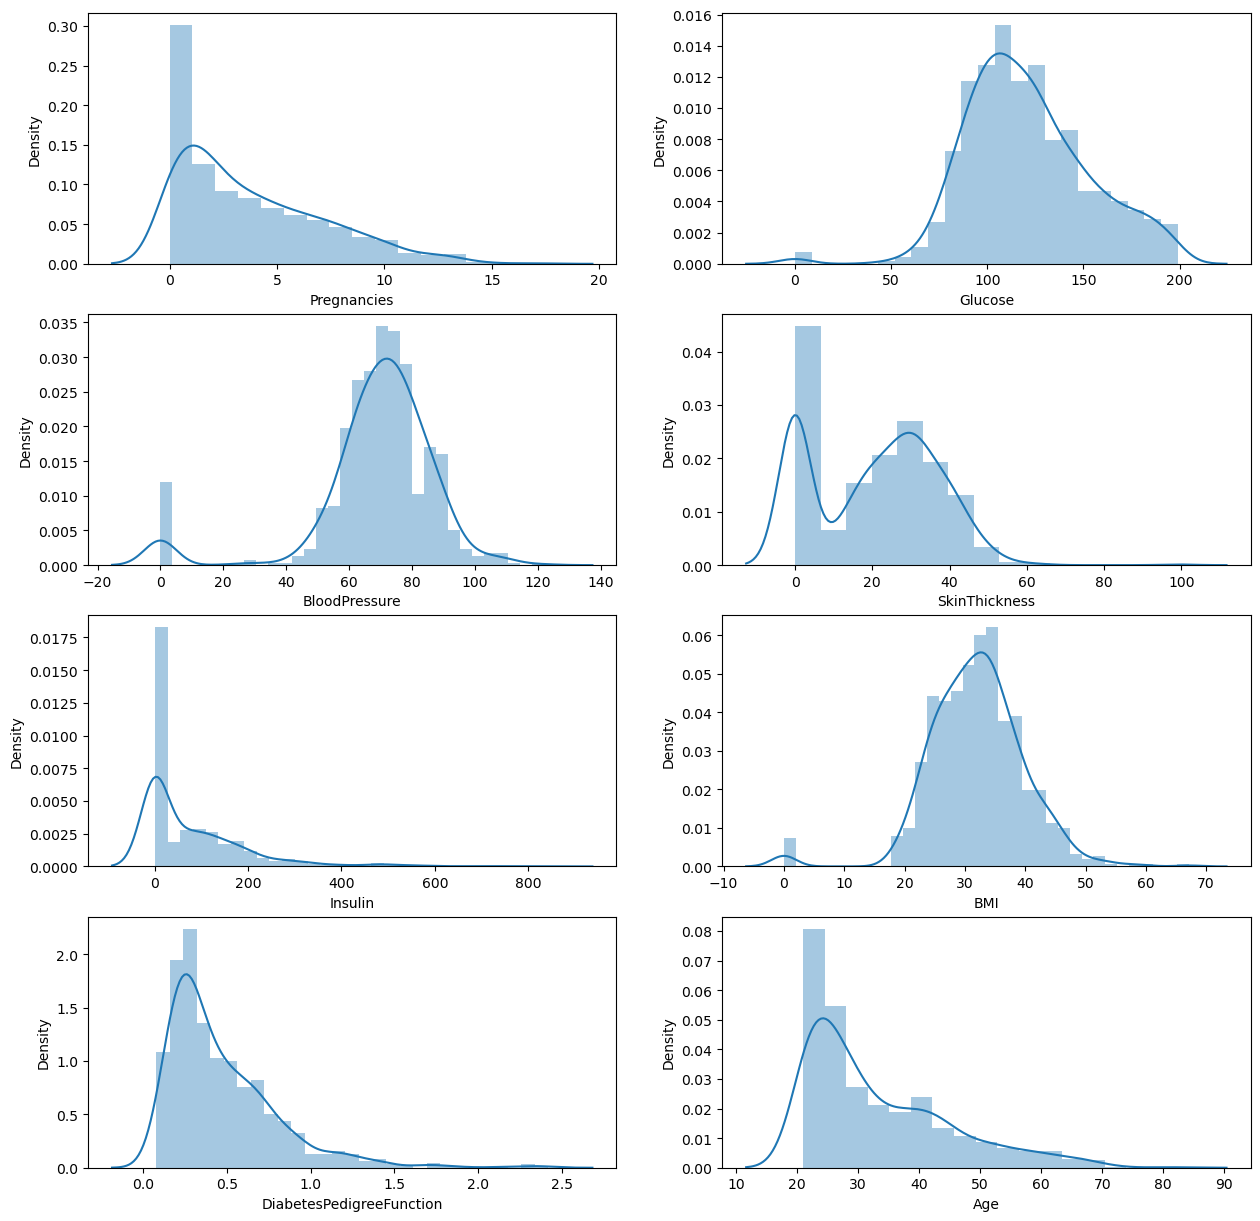

In [79]:
# Outcome 제외한 Age까지 distplot 다시 그리기

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))

for i, col_name in enumerate(cols[:-1]):
    row = i // 2 # 소수점 제외한 몫
    col = i % 2
    sns.distplot(df[col_name], ax=axes[row][col])

C:\Users\ksh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ksh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ksh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

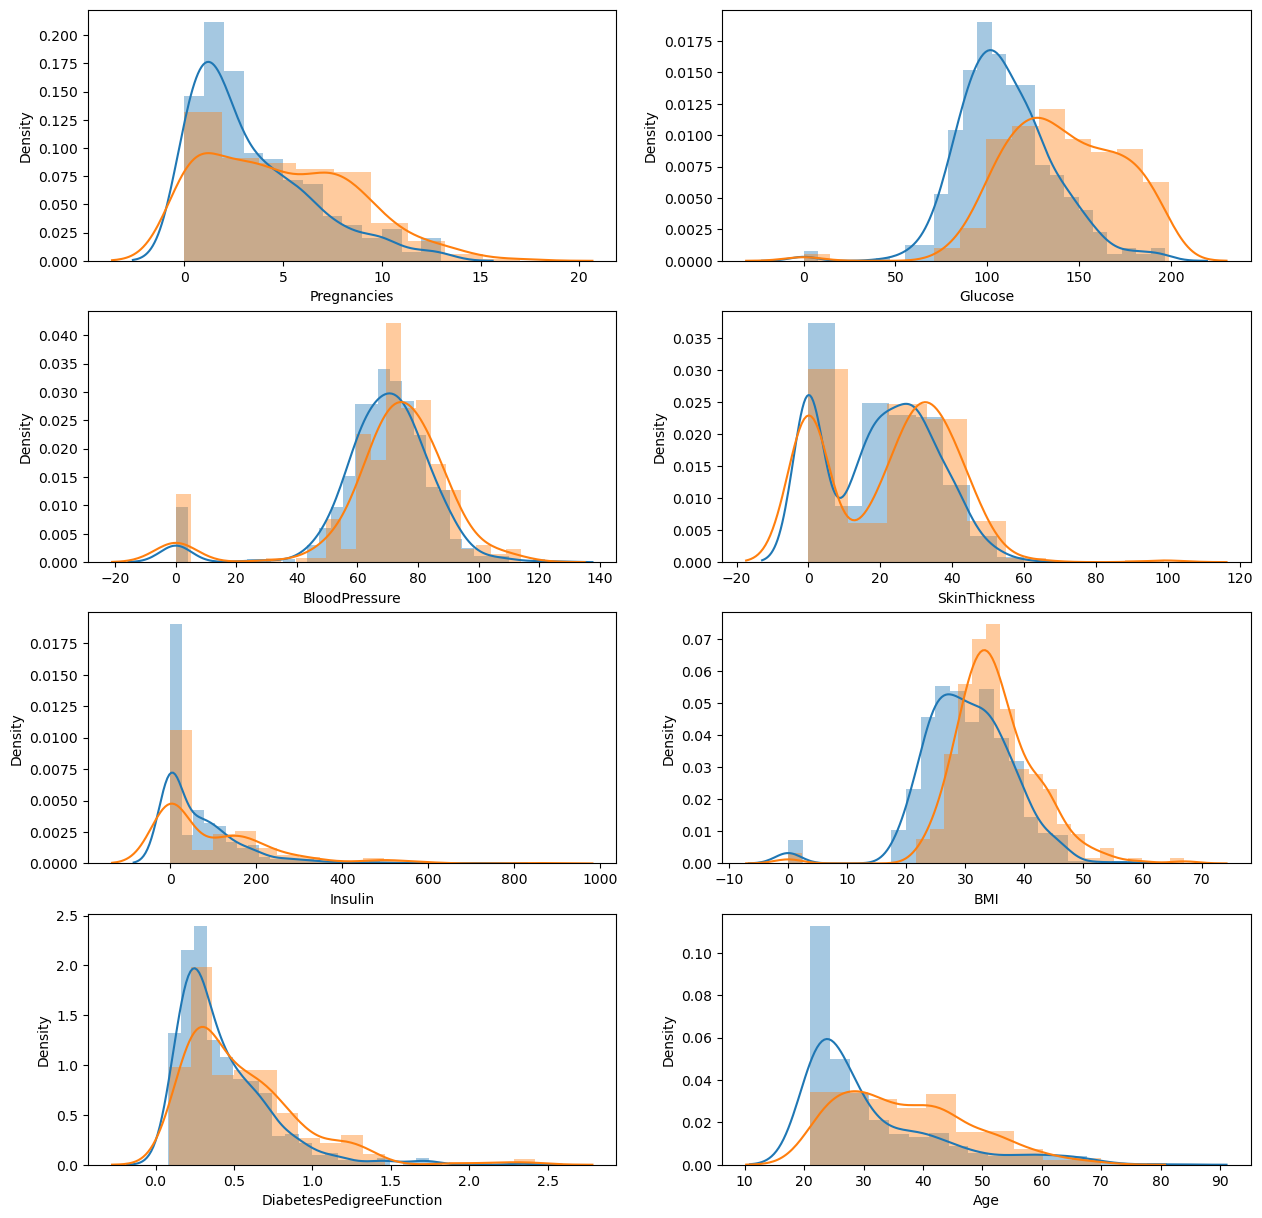

In [81]:
# Outcome 제외한 Age까지 distplot 다시 그리기 - 발병 여부 따로 표현하기

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))

for i, col_name in enumerate(cols[:-1]):
    row = i // 2 # 소수점 제외한 몫
    col = i % 2
    sns.distplot(df_0[col_name], ax=axes[row][col])
    sns.distplot(df_1[col_name], ax=axes[row][col])

#### violinplot

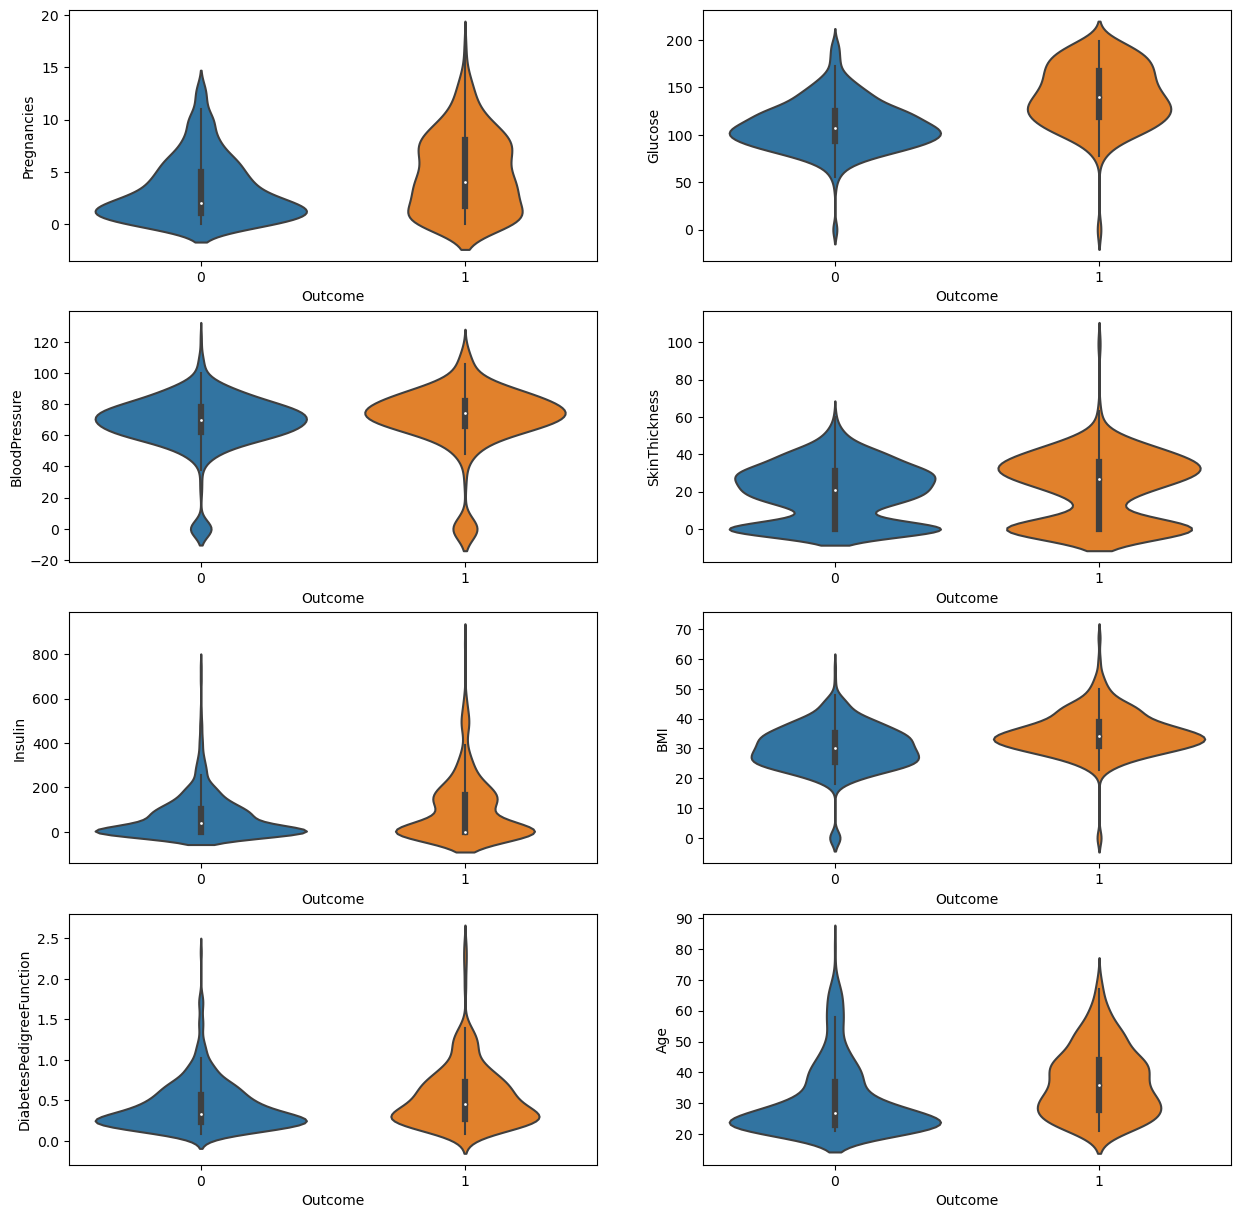

In [84]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))

for i, col_name in enumerate(cols[:-1]):
    row = i // 2 # 소수점 제외한 몫
    col = i % 2
    sns.violinplot(data=df, x="Outcome",  y=col_name, ax=axes[row][col])

#### Implot
* 상관계수가 높은 두 변수에 대해 시각화

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

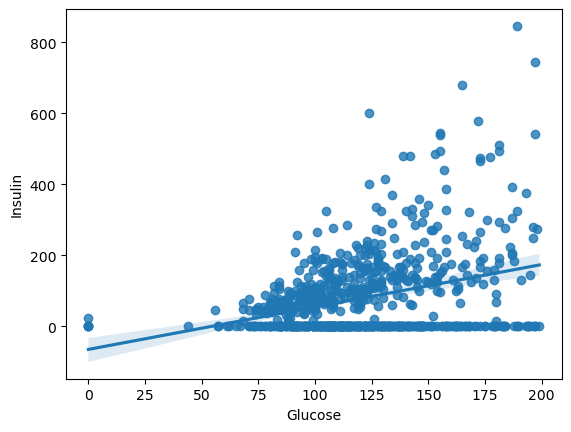

In [86]:
# Glucose와 Insulin을 Outcome으로 구분 (일반적으로 두 변수가 상관관계가 놓을 것으로 예상되어 선택)

sns.regplot(data=df, x="Glucose", y="Insulin")

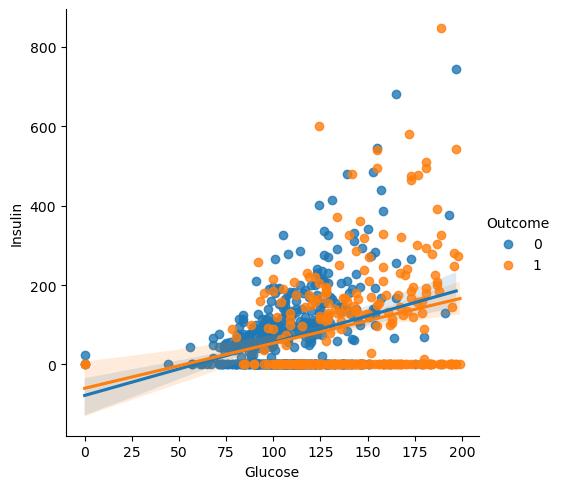

In [88]:
# hue="Outcome" 추가
sns.lmplot(data=df, x="Glucose", y="Insulin", hue="Outcome")

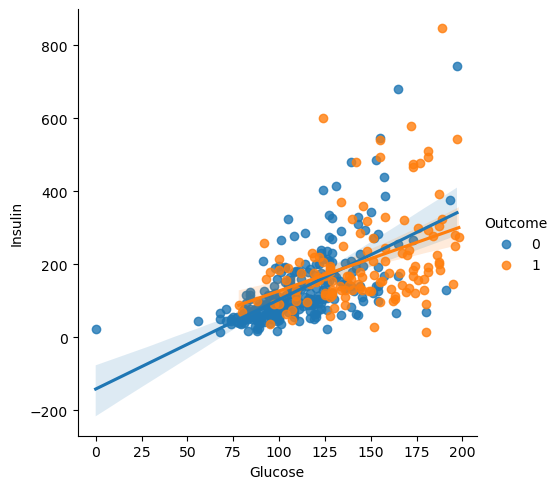

In [90]:
# Insulin에 0인 값이 많아 회귀선이 아래에 위치 -> Insulin 0 이상만 표현

sns.lmplot(data=df[df["Insulin"]>0], x="Glucose", y="Insulin", hue="Outcome")

# 회귀선의 기울기가 좀 더 1에 가까워진 것을 확인

#### Pairplot
* 숫자형변수 - 숫자형변수 의 관계를 기본으로 그린다 (default 로 x_vars=None, y_vars = None 일 경우)
* 숫자형변수 - 카테고리컬변수 관계도 그릴 수 있으며, (x_vars , y_vars 를 설정하면)
* 내가 선택한 변수관계에 따라서, 자동으로 gird 구조의 subplot을 그려주는 것이 특징

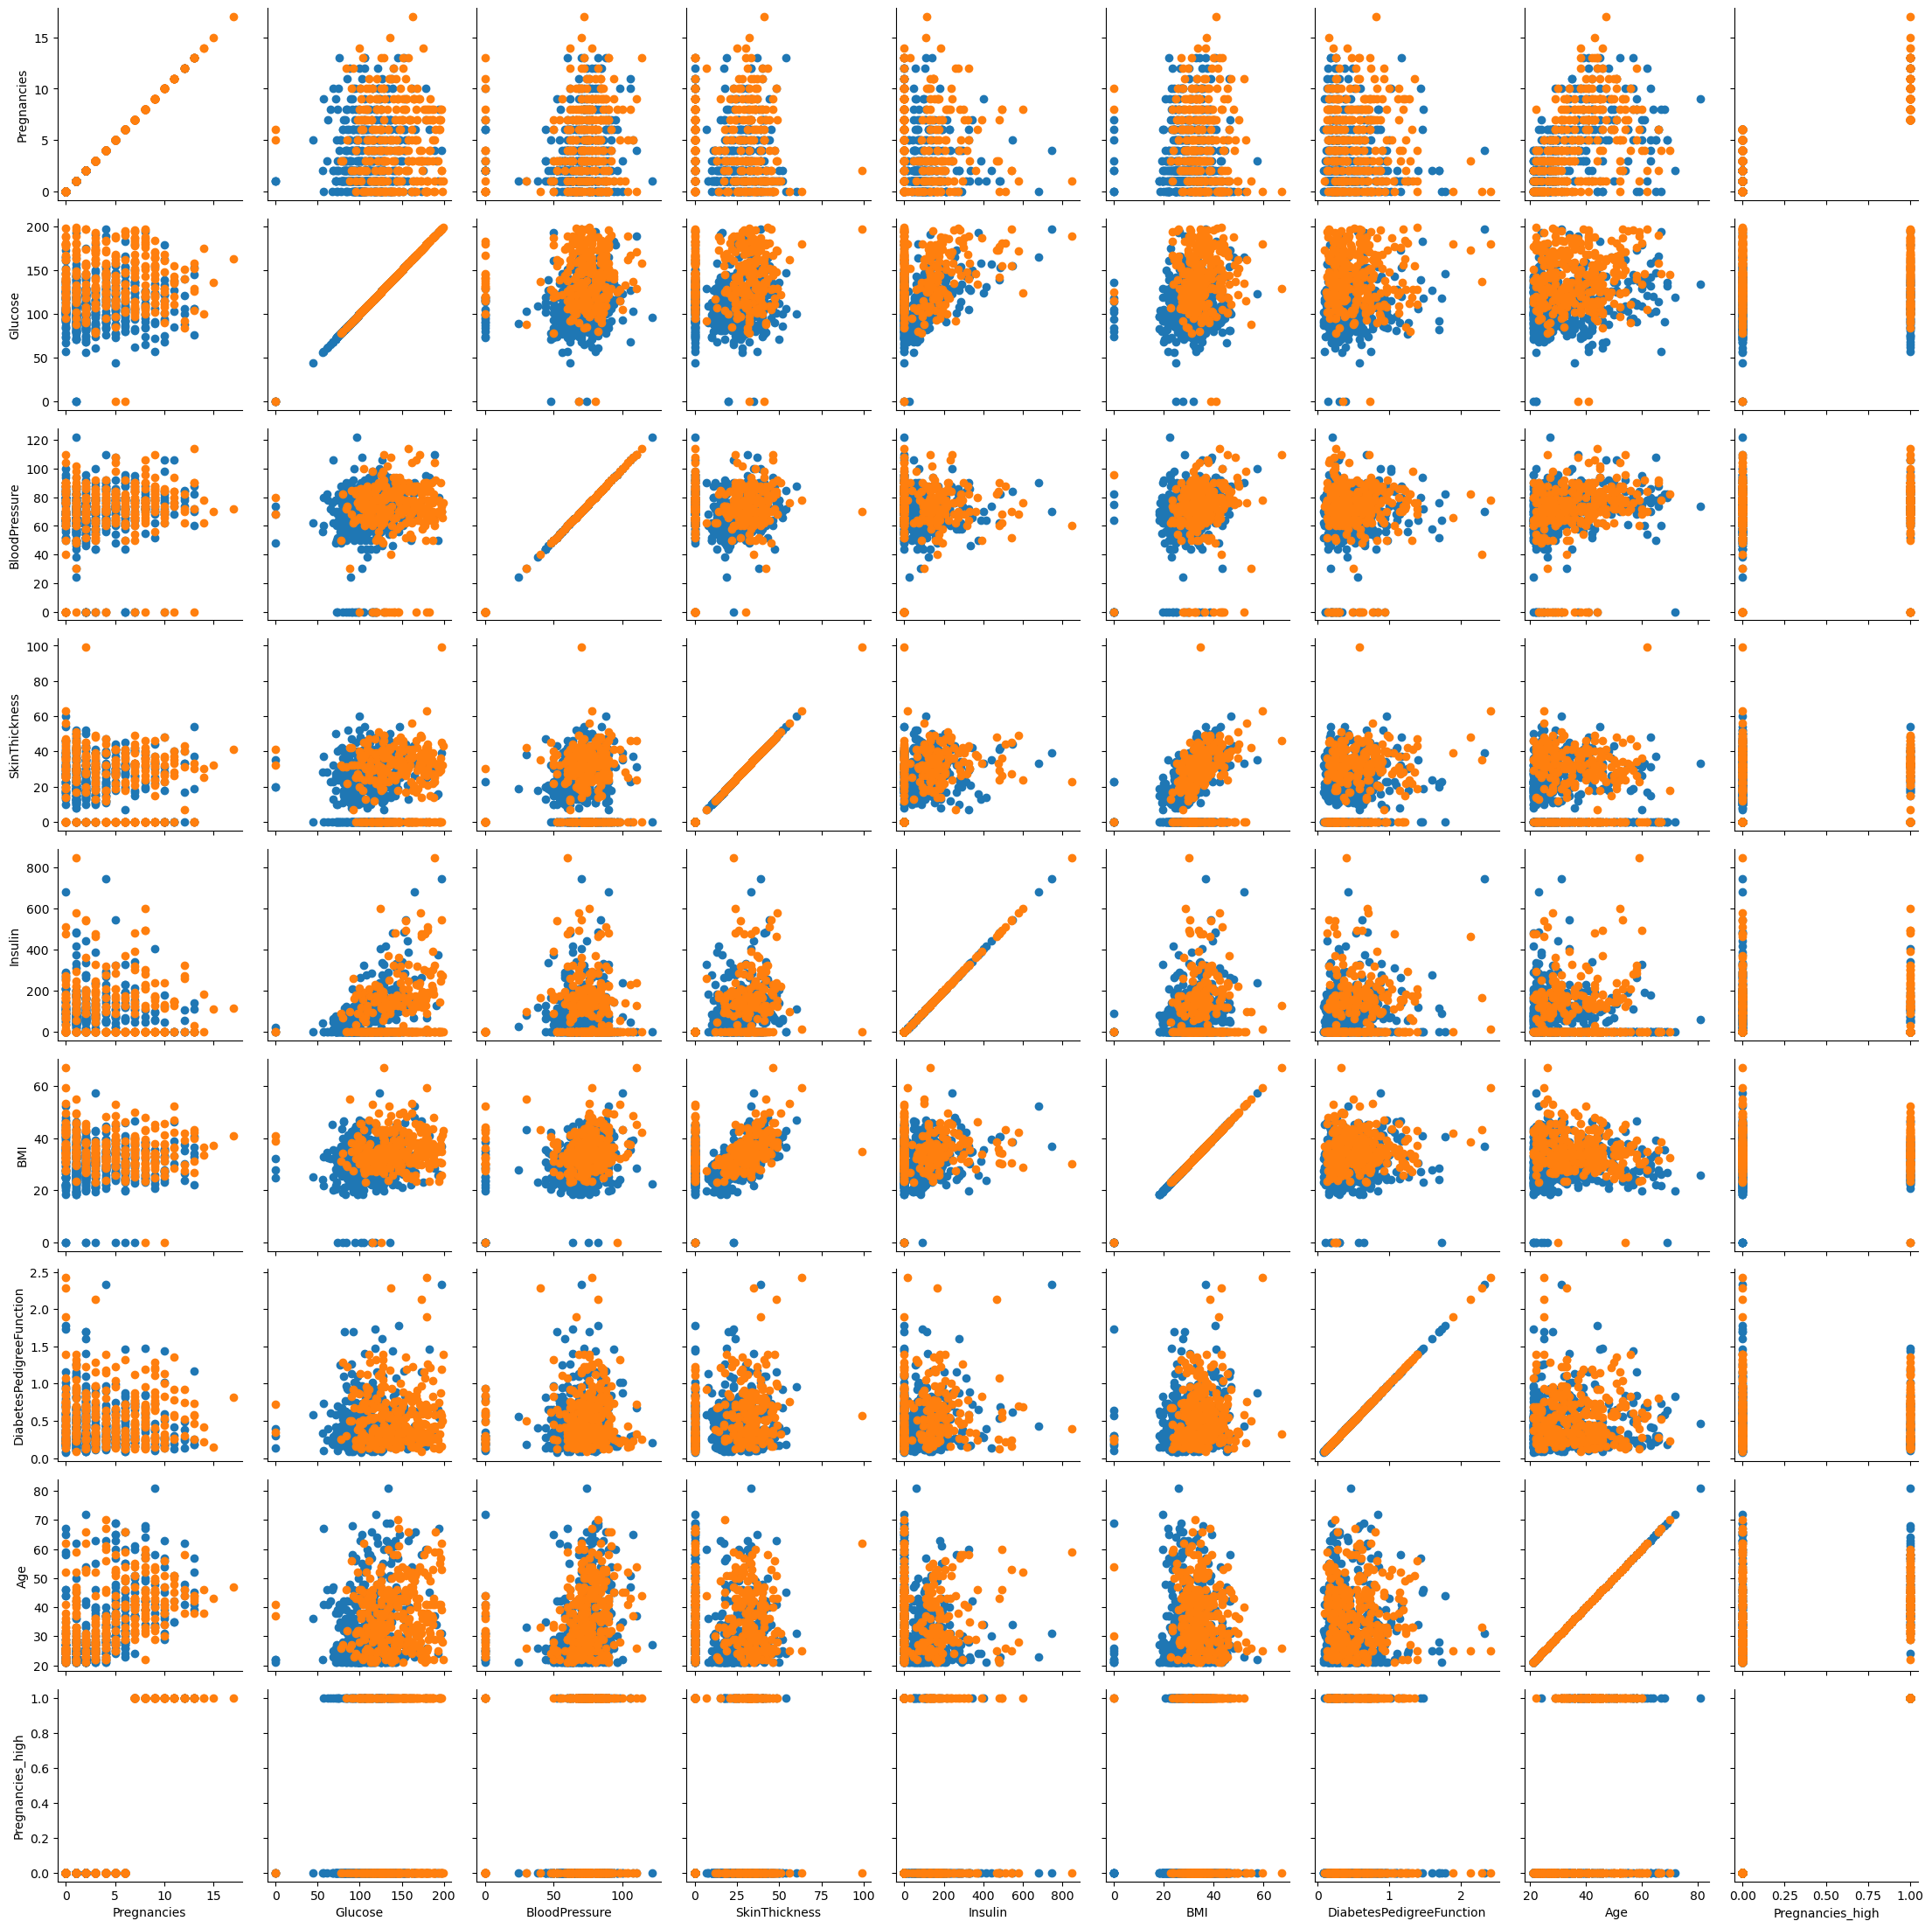

In [93]:
# pairGrid를 통해 모든 변수에 대해 Outcome에 따른 scatterplot을 그림

g = sns.PairGrid(df, hue="Outcome")
g.map(plt.scatter)

### 상관분석
r이 -1.0과 -0.7 사이 -> 강한 음적 선형관계</br>
r이 -0.7과 -0.3 사이 -> 뚜렷한 음적 선형관계</br>
r이 -0.3과 -0.1 사이 -> 약한 음적 선형관계</br>
r이 -0.1과 +0.1 사이 -> 거의 무시될 수 있는 선형관계</br>
r이 +0.1과 +0.7 사이 -> 뚜렷한 양적 선형관계</br>
r이 +0.7과 +1.0 사이 -> 강한 양적 선형관계</br>

In [94]:
# 상관계수 구하기

df_corr = df.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.821533
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.151271
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.122218
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,-0.030295
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,-0.031523
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.039075
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.016022
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.468883
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.237557
Pregnancies_high,0.821533,0.151271,0.122218,-0.030295,-0.031523,0.039075,0.016022,0.468883,0.237557,1.000000


In [101]:
# 정답 값인 Outcome을 제외하고 feature로 사용할 컬럼들에 대해 0을 결측치로 만들어 줌.
df_matrix = df.iloc[:,:-2].replace(0, np.nan)
df_matrix["Outcome"] = df["Outcome"]

df_corr = df_matrix.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.166329,0.285013,0.167298,0.104081,0.128207,-0.006459,0.550525,0.268218
Glucose,0.166329,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.285013,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.167298,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.104081,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.128207,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.006459,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.550525,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.268218,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


<AxesSubplot:>

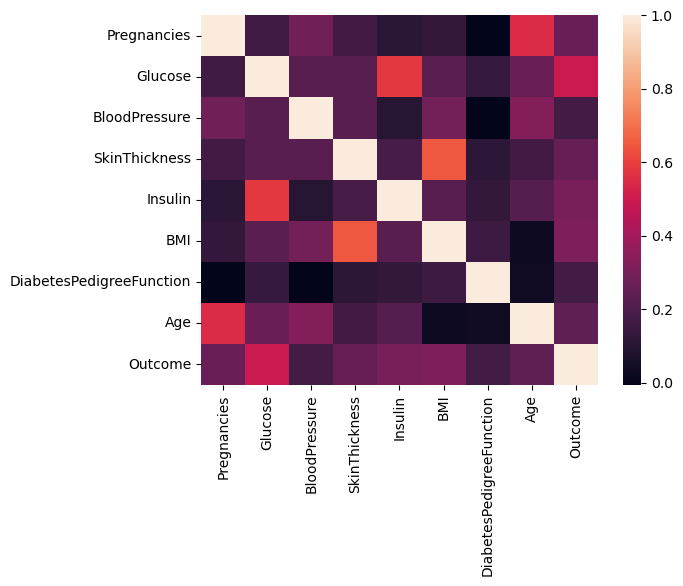

In [102]:
# 위에서 구한 상관계수를 heatmap응로 시각화

sns.heatmap(df_corr) 

<AxesSubplot:>

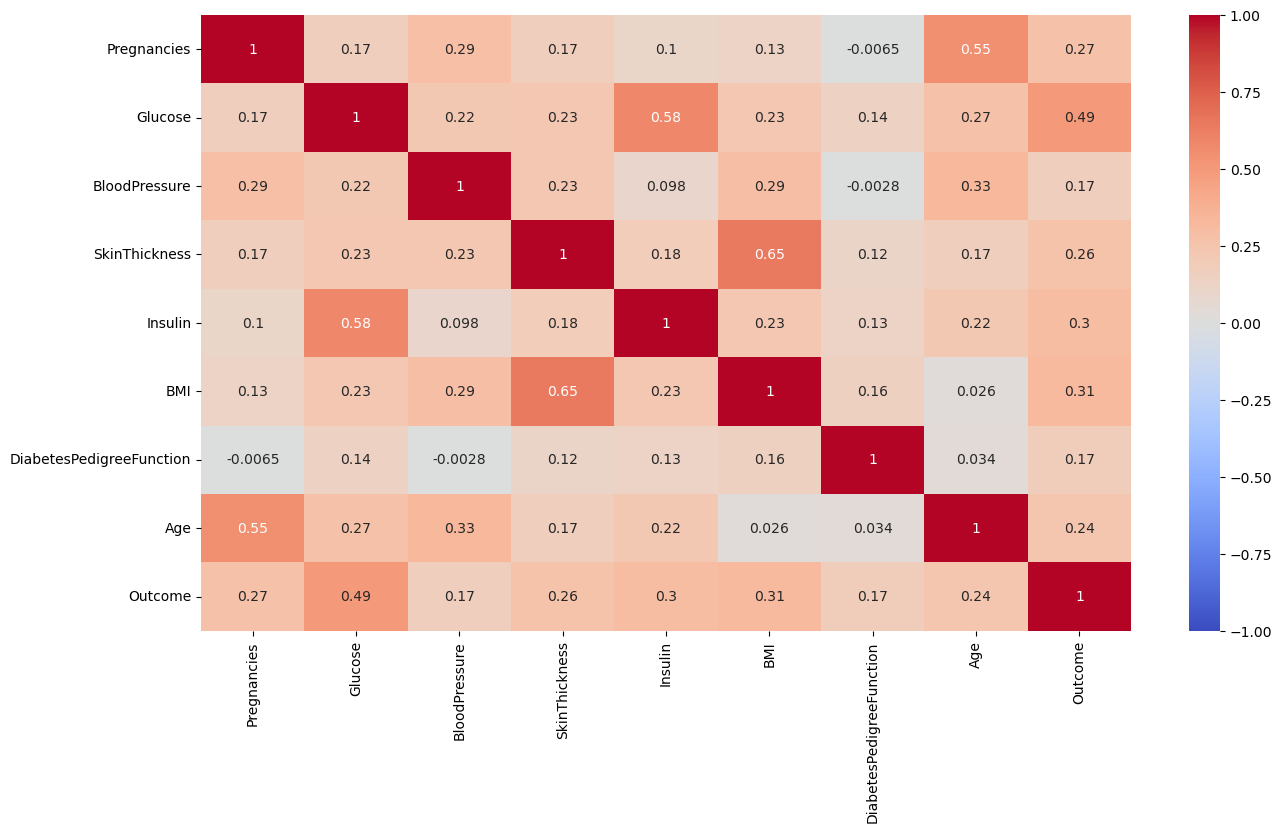

In [103]:
# 음의상관관계도 같이 표시
plt.figure(figsize=(15,8))
sns.heatmap(df_corr, vmax=1, annot=True, vmin=-1, cmap="coolwarm") 

In [104]:
# Outcome 수치에 대한 상관계수만 확인
df_corr["Outcome"]

Pregnancies                 0.268218
Glucose                     0.494650
BloodPressure               0.170589
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

#### 상관계수가 높은 변수끼리 보기

<AxesSubplot:xlabel='Insulin', ylabel='Glucose'>

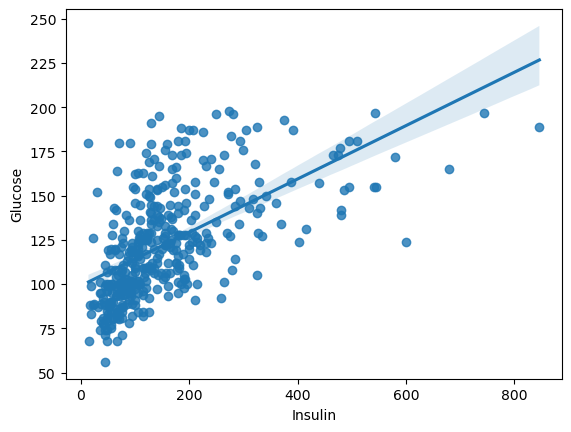

In [105]:
# Insulin과 Glucose로 regplot 그리기
sns.regplot(data=df_matrix, x="Insulin", y="Glucose")

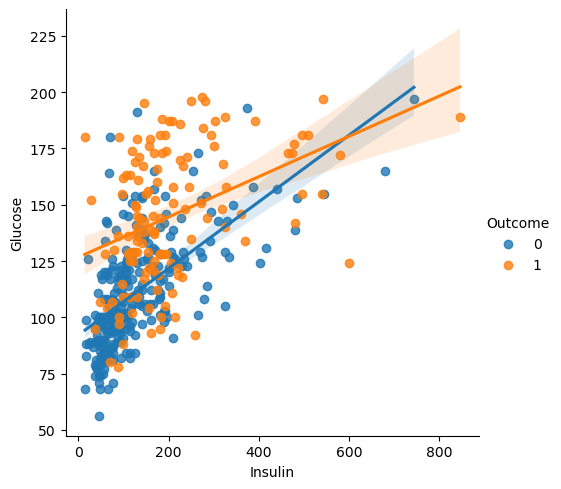

In [110]:
sns.lmplot(data=df_matrix, x="Insulin", y="Glucose", hue="Outcome")
# Insulin이 200이하, Glucose가 100이하일 때 발병하지 않는 케이스가 많이 분포되어 있음

<AxesSubplot:xlabel='Age', ylabel='Pregnancies'>

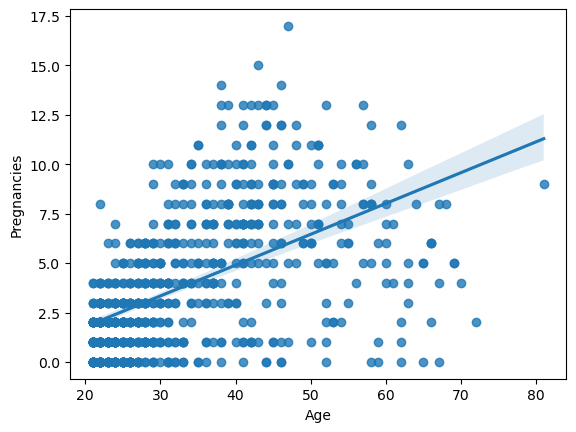

In [107]:
# Age와 Pregnancies로 regplot 그리기

sns.regplot(data=df, x="Age", y="Pregnancies")

# Age가 증가함에따라 Pregnancies도 증가함을 확인
# 이상치값들 계속 가져갈지 전처리할지 판단 필요

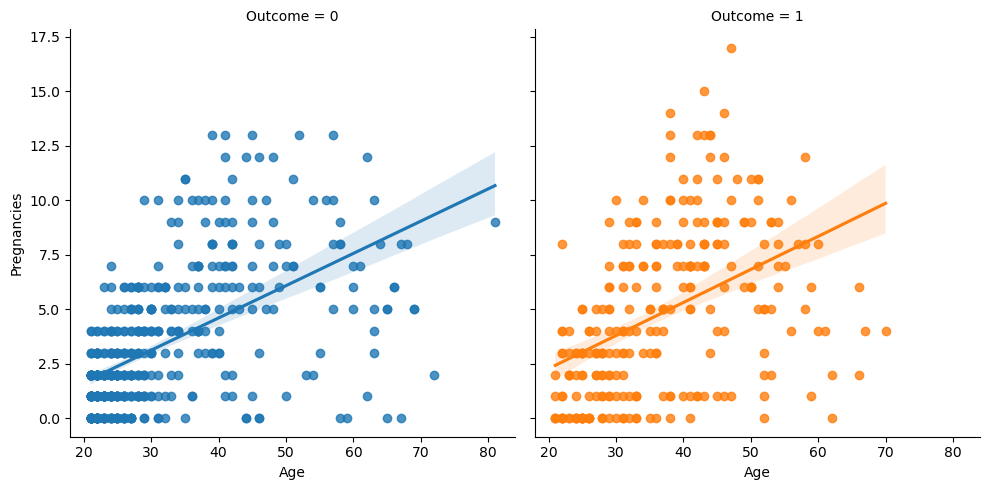

In [109]:
# Age와 Pregnancies로 lmplot을 그리고 Outcome에 따라 다른 색상을 표현

sns.lmplot(data=df, x="Age", y="Pregnancies", hue="Outcome", col="Outcome")